# Basic workflow (without YAML)
For basic workflow with YAML, refer to `generation.ipynb` and `config/generation/mcts_example.yaml`.

In [1]:
# Path setup

import sys
repo_root = "../" # Change this if running the notebook from a different directory
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
# Imports (may take some time on the first run)

from node import SMILESStringNode
from transition import JensenTransition
from reward import LogPReward
from policy import UCT
from filter import ValidityFilter, RadicalFilter
from generator import MCTS

/opt/anaconda3/envs/v3env-m/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterHierarchyMatcher> already registered; second conversion method ignored.


In [3]:
# Set up generator (without YAML)

benzene = SMILESStringNode.node_from_key("c1ccccc1")
uct = UCT(c=0.1, best_rate=0.9) # Hover over "UCT" to see its available arguments, typpes, default values, and descriptions (may not be supported in all IDEs)
jensen_transition = JensenTransition()
reward = LogPReward()
filters = [ValidityFilter(), RadicalFilter()] # ValidityFilter checks whether the molecule is valid. Since other filters and rewards typically assume validity and do not recheck it, this filter should usually be applied first in molecular generation.

generator = MCTS(root=benzene, transition=jensen_transition, reward=reward, filters=filters, filter_reward=[-1,0], policy=uct,
                 info_interval=100, output_dir="generation_result/tutorial")

In [4]:
# Start generation

generator.generate(max_generations=1000, time_limit=60) # Stops generation when either the number of generated nodes reaches 1000 or 60 seconds have passed. 
# Each generated molecule is logged to a CSV file in the output directory as soon as it is generated.

Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.2107, node: CC=CC=CC
<Best reward updated> 5 - time: 0.04, reward: 0.2401, node: Brc1ccccc1
<Best reward updated> 13 - time: 0.05, reward: 0.2671, node: Sc1cccc(Br)c1
<Best reward updated> 14 - time: 0.07, reward: 0.3007, node: Clc1ccc(Br)cc1
<Best reward updated> 28 - time: 0.18, reward: 0.3106, node: Brc1cccc(Br)c1
100 - time: 0.25, average over 100: 0.2189
<Best reward updated> 111 - time: 0.29, reward: 0.3683, node: Clc1cc(Br)ccc1Br
<Best reward updated> 127 - time: 0.54, reward: 0.3777, node: Brc1ccc(Br)c(Br)c1
200 - time: 1.06, average over 100: 0.2735
300 - time: 1.26, average over 100: 0.2782
<Best reward updated> 303 - time: 1.26, reward: 0.3870, node: BrC=CC=C(Br)C=CBr
<Best reward updated> 316 - time: 1.49, reward: 0.4223, node: Clc1cc(Br)ccc1SBr
<Best reward updated> 376 - time: 1.81, reward: 0.4312, node: BrSc1ccc(Br)c(Br)c1
<Best reward updated> 379 - time: 1.81, reward: 0.4412, node: Brc1cc(Br)c(Br)cc

Number of generated nodes: 1000
Valid rate: 1.0
Unique rate: 0.8216926869350862
Node per sec: 191.38242838759533
Best reward: 0.5554024118022313
Average reward: 0.36078553141438385
Top 10 AUC: 0.04165964849175041


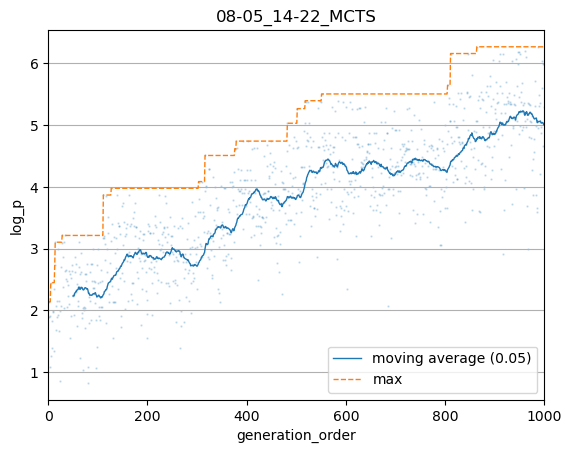

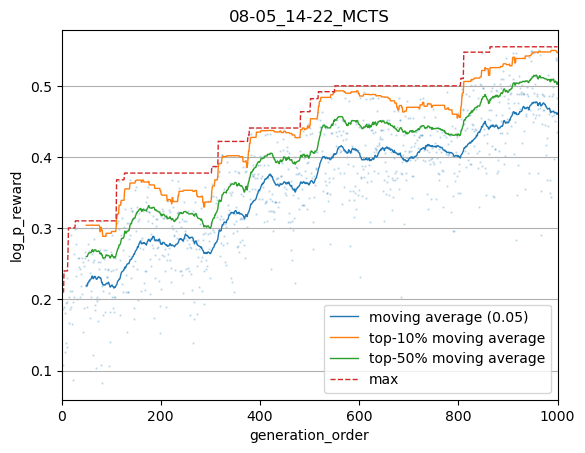

In [5]:
# Analyze and plot results

generator.analyze()
generator.plot(moving_average_window=0.05, reward_top_ps=[0.1, 0.5]) # Plot the objective values and final reward for the generated molecules. The plots will also be saved to the output directory.

# Save and load

In [6]:
# Continue generation using the existing generator

generator.generate(max_generations=200, time_limit=60)

Starting generation...
<Best reward updated> 1003 - time: 5.23, reward: 0.5734, node: Brc1cc(Br)c(C(Br)Br)c(Br)c1Br
<Best reward updated> 1038 - time: 5.65, reward: 0.5901, node: BrSc1c(Br)cc(Br)c(Br)c1SBr
<Best reward updated> 1039 - time: 5.65, reward: 0.5981, node: BrSc1c(Br)c(Br)c(Br)c(Br)c1Br
1100 - time: 5.82, average over 100: 0.4965
<Best reward updated> 1199 - time: 6.22, reward: 0.6008, node: BrCSc1c(Br)c(Br)c(Br)c(Br)c1Br
1200 - time: 6.22, average over 100: 0.4998
Generation finished.


In [7]:
# Save the generator and its current progress to a file

save_path = generator.output_dir() + "save.gtr" # Generator's output directory can be fetched using output_dir()
generator.save(save_path)

In [8]:
# Load generator

generator = MCTS.load(save_path, transition=JensenTransition()) # Since some transitions rely on heavy models, they are separated from the generator's saved state.

In [9]:
# Continue generation using the loaded generator

generator.generate(max_generations=200, time_limit=60)

Starting generation...
<Best reward updated> 1297 - time: 6.33, reward: 0.6376, node: BrSc1c(Br)c(Br)c(Br)c(Br)c1SBr
1300 - time: 6.33, average over 100: 0.5295
<Best reward updated> 1322 - time: 6.37, reward: 0.6381, node: BrSSc1c(Br)c(Br)c(Br)c(Br)c1Br
1400 - time: 7.59, average over 100: 0.5678
Generation finished.


# Analysis

In [10]:
# Generator methods for statistics.

print("Number of generated nodes: ", generator.n_generated_nodes())
print("Generated node per second: ", generator.node_per_sec())
print("Proportion of unfiltered generated nodes: ", generator.node_per_sec())
print("Average reward of top_p generated nodes: ", generator.average_reward(top_p=0.5))
print("AUC of the average of top_k rewards within 1000 generation: ", generator.auc(top_k=5, max_oracle_calls=1000)) # Assumes the reward is in the range [0, 1].

Number of generated nodes:  1400
Generated node per second:  183.8168500966349
Proportion of unfiltered generated nodes:  183.8168500966349
Average reward of top_p generated nodes:  0.498759649027164
AUC of the average of top_k rewards within 1000 generation:  0.6632592398038928


Probability: 0.210 Action: [*:1]!-[*:2]>>[*:1]-[*:2]


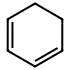

Probability: 0.233 Action: [*:1]@[*:2]>>([*:1].[*:2])


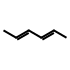

Probability: 0.233 Action: [*:1]@[*:2]>>([*:1].[*:2])


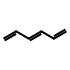

Probability: 0.012 Action: [#6:1]>>[#7:1]


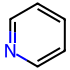

Probability: 0.011 Action: [#6:1]>>[#16:1]


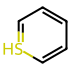

Probability: 0.043 Action: [*;!H0:1]>>[*:1]-C


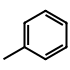

Probability: 0.043 Action: [*;!H0:1]>>[*:1]-N


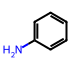

Probability: 0.043 Action: [*;!H0:1]>>[*:1]-O


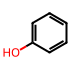

Probability: 0.043 Action: [*;!H0:1]>>[*:1]-F


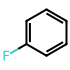

Probability: 0.043 Action: [*;!H0:1]>>[*:1]-S


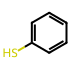

Probability: 0.043 Action: [*;!H0:1]>>[*:1]-Cl


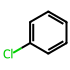

Probability: 0.043 Action: [*;!H0:1]>>[*:1]-Br


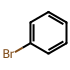

In [20]:
# Check transition

from utils import draw_mol

for child in generator.root.children:
    print(f"Probability: {child.last_prob:.3f} Action: {child.last_action}")
    draw_mol(child.mol(), width=70, height=70)